## Import Libraries

In [118]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

## Merging 12 months of sales data into a single CSV file

In [119]:
# Set the path to the directory containing the CSV files
from google.colab import drive 
drive.mount('/content/drive/')
path = "/content/drive/My Drive/PythonProject/Sales Data Analysis Project/Sales_Data"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [120]:
# Get a list of all the CSV files in the directory

csv_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv')]

In [121]:
# Combine all the CSV files into a single DataFrame

df = pd.concat((pd.read_csv(f) for f in csv_files))

In [122]:
# Write the combined DataFrame to a new CSV file

df.to_csv("/content/drive/My Drive/PythonProject/Sales Data Analysis Project" + "/merged.csv", index=False)

In [123]:
print(os.getcwd())

/content


In [124]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [125]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [126]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"
20378,278796,Wired Headphones,1,11.99,10/13/19 11:20,"547 Jefferson St, Los Angeles, CA 90001"


## Handling null values

In [127]:
# Counting the number of null values in each row
null_count = df.isnull().sum(axis=1)

### Counting the number of rows with null values
rows_with_null = len(null_count[null_count > 0])

print("Number of rows with null values:", rows_with_null)

Number of rows with null values: 545


### Deleting null values

In [128]:
df = df.dropna(axis=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [129]:
df.iloc[[517]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


# Augment data with some additional columns

### Task 1: Add a month column

In [130]:
# Converting the date column to a pandas datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Extracting the month name from the date column
df['Month'] = df['Order Date'].dt.strftime('%B')


df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [131]:
df.iloc[[517]]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [132]:
print(df["Month"].dtype)

object


In [133]:
# Define the month names in the desired order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical data type with the desired order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


In [134]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


### Task 2: Add sales column

In [135]:
df = df.dropna(axis=0)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [136]:
# Converting srting data to numeric data
df.loc[:, 'Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df.loc[:, 'Price Each'] = pd.to_numeric(df['Price Each'])

df['Sales'] = df["Quantity Ordered"] * df["Price Each"]
df.head()

<ipython-input-136-d60e68921f53>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
<ipython-input-136-d60e68921f53>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Price Each'] = pd.to_numeric(df['Price Each'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


### Task 3: Add a city column

In [137]:
# use .apply() method

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
          # here I have splited the Purchase Address with comma(,) and taken the 2nd index writing [1]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA


# Question 1: What was the best month for sales? How much was earned that month?

In [138]:
sales_by_month = df.groupby("Month").sum(numeric_only=True).reset_index()
sales_by_month

,Month,Quantity Ordered,Price Each,Sales
0,January,10903,1811768.38,1822256.73
1,February,13449,2188884.72,2202022.42
2,March,17005,2791207.83,2807100.38
3,April,20558,3367671.02,3390670.24
4,May,18667,3135125.13,3152606.75
5,June,15253,2562025.61,2577802.26
6,July,16072,2632539.56,2647775.76
7,August,13448,2230345.42,2244467.88
8,September,13109,2084992.09,2097560.13
9,October,22703,3715554.83,3736726.88


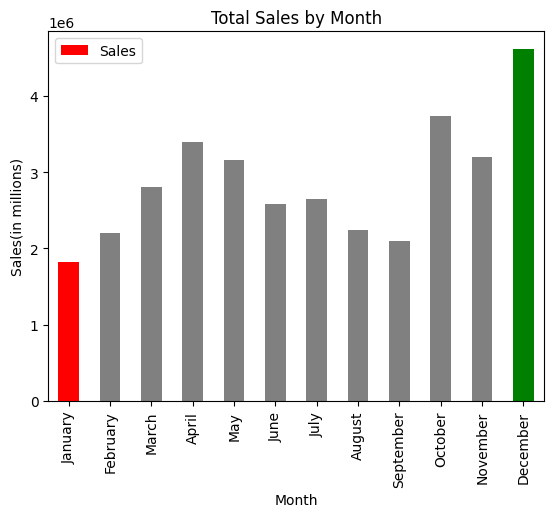

In [139]:
# Find the index of the row with maximum sales
max_sales_index = sales_by_month['Sales'].idxmax()

# Find the index of the row with minimum sales
min_sales_index = sales_by_month['Sales'].idxmin()

# Create a list of colors for the bars based on their position
colors = ['grey' if i != max_sales_index and i != min_sales_index else 'green' if i == max_sales_index else 'red' for i in range(len(sales_by_month))]

# Create the bar plot with the custom colors
ax = sales_by_month.plot.bar(x='Month', y='Sales', color=colors)

# Set the axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Sales(in millions)')
ax.set_title('Total Sales by Month')

plt.show()

# Question 2: What city had the highest number of sales?

In [140]:
sales_by_city = df.groupby("City").sum(numeric_only=True).reset_index()
sales_by_city

,City,Quantity Ordered,Price Each,Sales
0,Atlanta GA,16602,2779908.20,2795498.58
1,Austin TX,11153,1809873.61,1819581.75
2,Boston MA,22528,3637409.77,3661642.01
3,Dallas TX,16730,2752627.82,2767975.40
4,Los Angeles CA,33289,5421435.23,5452570.80
5,New York City NY,27932,4635370.83,4664317.43
6,Portland ME,2750,447189.25,449758.27
7,Portland OR,11303,1860558.22,1870732.34
8,San Francisco CA,50239,8211461.74,8262203.91
9,Seattle WA,16553,2733296.01,2747755.48


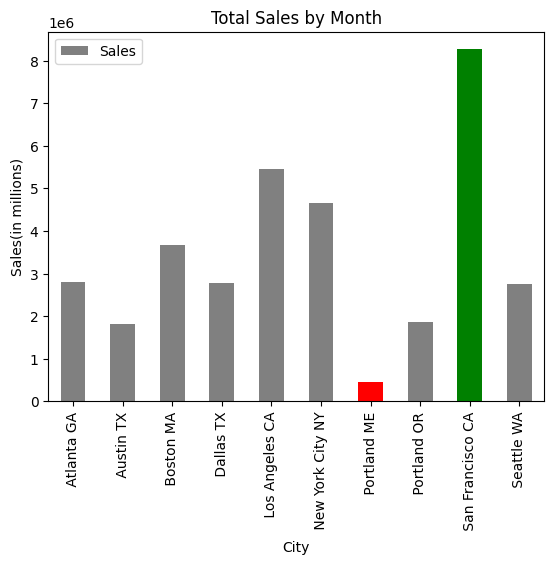

In [141]:
# Find the index of the row with maximum sales
max_sales_index = sales_by_city['Sales'].idxmax()

# Find the index of the row with minimum sales
min_sales_index = sales_by_city['Sales'].idxmin()

# Create a list of colors for the bars based on their position
colors = ['grey' if i != max_sales_index and i != min_sales_index else 'green' if i == max_sales_index else 'red' for i in range(len(sales_by_city))]

# Create the bar plot with the custom colors
ax = sales_by_city.plot.bar(x='City', y='Sales', color=colors)

# Set the axis labels and title
ax.set_xlabel('City')
ax.set_ylabel('Sales(in millions)')
ax.set_title('Total Sales by Month')

plt.show()

### Question 3: What time shuld we display advertisements to maximize likelyhood of customer's buying product?

In [142]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9,27


In [143]:
sales_by_hours = df.groupby("Hour").sum(numeric_only=True).reset_index()[['Hour', 'Sales']]
sales_by_hours.head()

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01


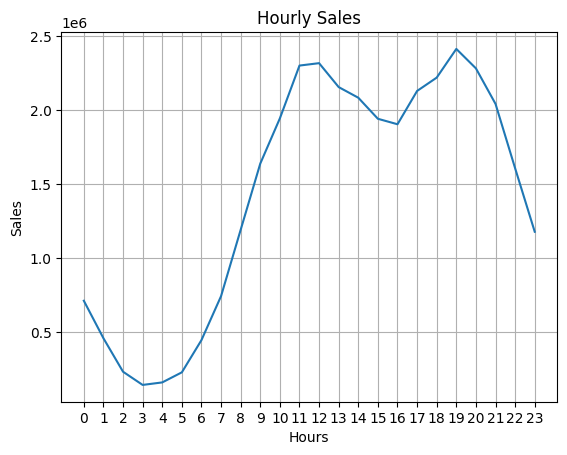

In [144]:
# create line graph
plt.plot(sales_by_hours['Hour'], sales_by_hours['Sales'])

# add labels and title
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.title('Hourly Sales')

plt.xticks(sales_by_hours['Hour'])
plt.grid()
# show the graph
plt.show()

# Question 4: What products are most often sold together?

In [145]:
# Creating a new data farame df1 what connsists the products that are sold together

df1 = df[df['Order ID'].duplicated(keep=False)]  # keep all duplicate rows in df1

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()
df1.head()

<ipython-input-145-f98c2fca23d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [146]:
df4 = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie', 'Rahat'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack', 'dider'],
    'rating': [4, 4, 3.5, 15, 5, 2]
})
df4

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0
5,Rahat,dider,2.0


In [147]:
# print(df4['brand'].duplicated(keep=False))

In [148]:
# Count the grouped products

from itertools import combinations
from collections import Counter


count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Print the grouped products that are 
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Question 5: What product sold the most?

In [149]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,Los Angeles CA,9,27


In [152]:
# Counting the 
product_quantity = df.groupby("Product", as_index=False)[["Product", "Quantity Ordered"]].sum(numeric_only=True)
      #  'as_index=False' is used to ensure that the "Product" column is not used as the index of the resulting DataFrame
product_quantity_sorted = product_quantity.sort_values(by="Quantity Ordered", ascending=False)
product_quantity_sorted

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


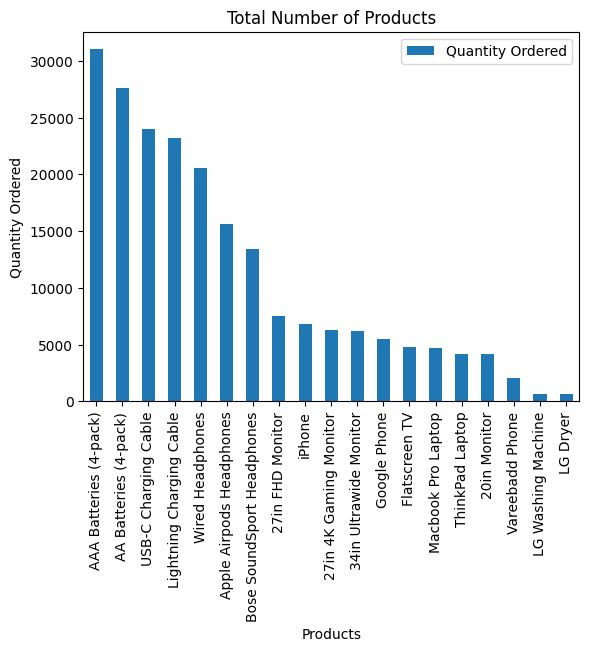

In [154]:
# Create the bar plot with the custom colors
ax = product_quantity_sorted.plot.bar(x='Product', y='Quantity Ordered')

# Set the axis labels and title
ax.set_xlabel('Products')
ax.set_ylabel('Quantity Ordered')
ax.set_title('Total Number of Products')

plt.show()